In [0]:
#!pip install pandas-profiling

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
#import pandas_profiling
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
PATH = r'/content/drive/My Drive/Colab Notebooks/Msc project/'
dataset = pd.read_csv(PATH + 'train_FA.csv')
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [0]:
dataset = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Msc project/medium_clean2.csv')
dataset = dataset.drop(['Unnamed: 0'], axis=1)

In [31]:
tags = ['ai', 'android', 'apple', 'architecture', 'art',
       'artificial intelligence', 'big data', 'bitcoin', 'blacklivesmatter',
       'blockchain', 'blog', 'blogging', 'books', 'branding', 'business',
       'college', 'computer science', 'creativity', 'cryptocurrency',
       'culture', 'data', 'data science', 'data visualization',
       'deep learning', 'design', 'dogs', 'donald trump', 'economics',
       'education', 'energy', 'entrepreneurship', 'environment', 'ethereum',
       'feminism', 'fiction', 'food', 'football', 'google', 'government',
       'happiness', 'health', 'history', 'humor', 'inspiration', 'investing',
       'ios', 'javascript', 'jobs', 'journalism', 'leadership', 'life',
       'life lessons', 'love', 'machine learning', 'marketing', 'medium',
       'mobile', 'motivation', 'movies', 'music', 'nba', 'news', 'nutrition',
       'parenting', 'personal development', 'photography', 'poem', 'poetry',
       'politics', 'product design', 'productivity', 'programming',
       'psychology', 'python', 'racism', 'react', 'relationships', 'science',
       'self improvement', 'social media', 'software engineering', 'sports',
       'startup', 'tech', 'technology', 'travel', 'trump', 'ux',
       'venture capital', 'web design', 'web development', 'women',
       'wordpress', 'work', 'writing']
labels = dataset.columns[1:63]
labels

Index(['android', 'apple', 'art', 'artificial intelligence', 'big data',
       'blacklivesmatter', 'blockchain', 'blog', 'books', 'business',
       'culture', 'data', 'data science', 'design', 'dogs', 'education',
       'energy', 'entrepreneurship', 'environment', 'feminism', 'fiction',
       'food', 'google', 'health', 'history', 'humor', 'investing', 'ios',
       'javascript', 'jobs', 'journalism', 'leadership', 'life',
       'life lessons', 'love', 'machine learning', 'marketing', 'mobile',
       'movies', 'music', 'news', 'parenting', 'photography', 'poetry',
       'politics', 'productivity', 'programming', 'psychology', 'science',
       'self improvement', 'social media', 'software engineering', 'sports',
       'startup', 'tech', 'technology', 'travel', 'web development', 'women',
       'wordpress', 'work', 'writing'],
      dtype='object')

In [0]:
from sklearn.model_selection import  train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
train

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language
398970,a weekend of food craft beer and beaches on th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,en
329853,peace love compassion forgiveness and gratitude,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en
153896,wyomings pronghorn gauntlet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en
10868,best open source android apps you must try them,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en
549692,planning for mismatched bridesmaid dresses tip...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,free luann shirt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en
365838,powerful lyrics today,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en
131932,luc descheemaeker bully boys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en
671155,billion dollar man in big tech town follows dr...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11,en


In [25]:
counts = []
tags = list(df.columns[1:-10].values)
for i in tags:
    counts.append((i, df[i].sum()))
df_stats = pd.DataFrame(counts, columns=['tag', 'number_of_tags'])
df_stats

,tag,number_of_tags
0,android,0
1,apple,1
2,art,1
3,artificial intelligence,1
4,big data,0
...,...,...
57,web development,0
58,women,1
59,wordpress,0
60,work,2


In [0]:
counts = []
tags = list(test.columns[1:-2].values)
for i in tags:
    counts.append((i, test[i].sum()))
df_stats_test = pd.DataFrame(counts, columns=['tag', 'number_of_tags'])
df_stats_test

,tag,number_of_tags
0,android,2744
1,apple,1486
2,art,4745
3,artificial intelligence,4278
4,big data,1143
...,...,...
57,web development,5249
58,women,2617
59,wordpress,908
60,work,1674


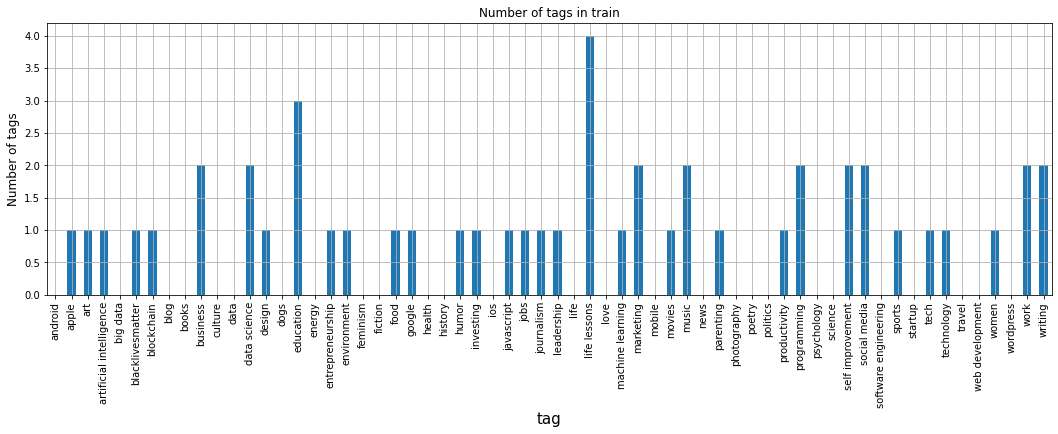

In [26]:
df_stats.plot(x='tag', y='number_of_tags', kind='bar', legend=False, grid=True, figsize=(18, 5))
plt.title("Number of tags in train")
plt.ylabel('Number of tags', fontsize=12)
plt.xlabel('tag', fontsize=15);

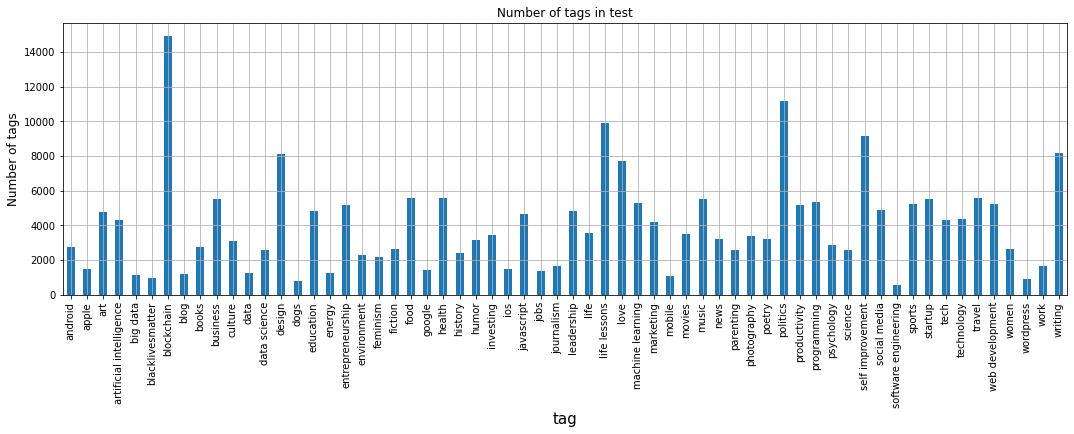

In [0]:
df_stats_test.plot(x='tag', y='number_of_tags', kind='bar', legend=False, grid=True, figsize=(18, 5))
plt.title("Number of tags in test")
plt.ylabel('Number of tags', fontsize=12)
plt.xlabel('tag', fontsize=15);

In [0]:
dict_label = {label: sum(train[label]) for label in labels}
labels_data  = pd.DataFrame(index=dict_label.keys(),data=dict_label.values(), columns=['Count']).sort_values(by="Count", ascending=False)

labels_data.head()

,Count
blockchain,59980
politics,44313
life lessons,40004
self improvement,36942
design,32883


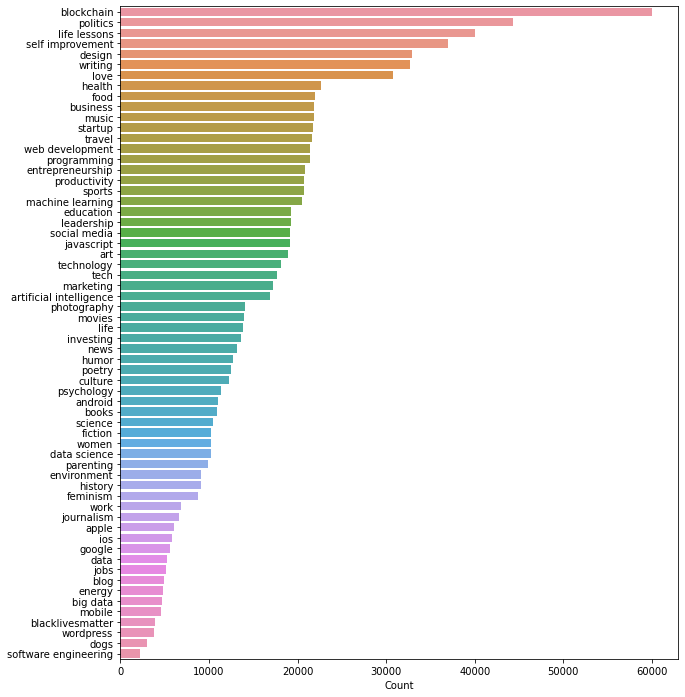

In [0]:
plt.figure(figsize=(10, 12))
ax = sns.barplot(y=labels_data.index, x=labels_data.Count)

In [37]:
dataset.head()

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords,num_of_tags
0,a weekend of food craft beer and beaches on th...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,en,food craft beer delaware shore weekend of food,food,12,7,51,16,5,1
1,peace love compassion forgiveness and gratitude,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en,peace love compassion love compassion forgiven...,love,6,4,42,18,1,1
2,wyomings pronghorn gauntlet,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,wyomings pronghorn gauntlet wyomings pronghorn...,None,3,3,25,17,0,1
3,best open source android apps you must try them,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en,open source android source android apps open s...,android,9,4,39,17,2,1
4,planning for mismatched bridesmaid dresses tip...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,en,mismatched bridesmaid dresses bridesmaid dress...,None,7,6,52,19,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
736766,free luann shirt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,free luann shirt free luann luann shirt,None,3,3,14,12,0,1
736767,powerful lyrics today,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,powerful lyrics today powerful lyrics lyrics t...,None,4,3,19,16,0,1
736768,luc descheemaeker bully boys,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,luc descheemaeker bully descheemaeker bully bo...,None,4,4,25,15,0,1
736769,billion dollar man in big tech town follows dr...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,11,en,billion dollar man big tech town billion dollar,tech,11,6,49,19,1,2


Text(0.5, 0, '# of categories')

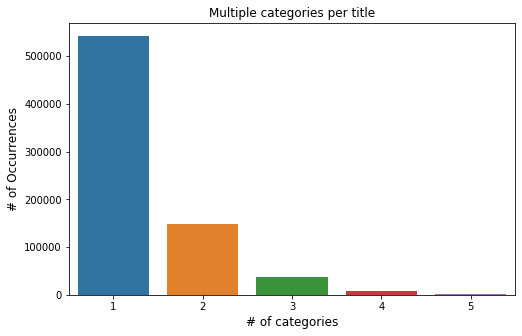

In [5]:
rowsums = dataset.loc[:,labels].sum(axis=1)
x=rowsums.value_counts()
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per title")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)

In [0]:
dataset['num_of_tags']= rowsums

In [30]:
#print(dataset.shape[0])
dataset[dataset['num_of_tags'] == 5][360:500]

,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords,num_of_tags
330458,every millisecond counts why time is everythin...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,9,en,millisecond counts counts why time businesses,business,9,5,54,20,3,5
330468,the difference between criticism and construct...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,en,constructive criticism difference between crit...,None,6,5,53,18,3,5
332033,how can slowing down guarantee remarkable resu...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,8,en,guarantee remarkable results remarkable result...,None,8,5,43,19,3,5
332227,the freecodecamp medium publication editor han...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,6,en,publication editor handbook freecodecamp mediu...,None,6,5,46,18,1,5
334883,are we dumb terminals,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,5,en,dumb terminals terminals dumb,None,5,2,18,14,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447688,finding the balance between time and memory co...,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10,en,memory complexityan illustrated finding the ba...,None,10,8,67,22,3,5
448778,day one one big thing,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,5,en,big thing day thing,None,4,3,17,12,0,5
449109,if there is no struggle there is no progress,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,10,en,progress struggle,None,7,2,36,14,7,5
449837,visualizing big data to get the big picture,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,8,en,visualizing big data visualizing big big picture,big data data,7,4,36,19,2,5


In [5]:
import random
items = [87536,587008,421665,28960,95718,711307,687917,548736,555203,544400,200819,540829,352483,388512,272996,
652219,83400,229120,229125,229130,49962,231698,231702,189249,510578,463112,463121,538303,480528,548493,
74123,74126,699485]
df =dataset.filter(items,axis=0)
df


,Title,android,apple,art,artificial intelligence,big data,blacklivesmatter,blockchain,blog,books,business,culture,data,data science,design,dogs,education,energy,entrepreneurship,environment,feminism,fiction,food,google,health,history,humor,investing,ios,javascript,jobs,journalism,leadership,life,life lessons,love,machine learning,marketing,mobile,movies,music,news,parenting,photography,poetry,politics,productivity,programming,psychology,science,self improvement,social media,software engineering,sports,startup,tech,technology,travel,web development,women,wordpress,work,writing,word_cnt,language,key_word,tags,number_unique_words,number_unique_key_word,number_letters,number_unique_letters,number_stopwords
87536,save your moneythe cost of making a short film,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,en,save your moneythe short film moneythe cost,None,9,6,38,19,3
587008,navigation in swift,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,en,navigation in swift navigation swift,None,3,3,17,11,1
421665,iconic eateries of nyc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,iconic eateries eateries of nyc iconic,None,4,4,19,12,1
28960,dont you know thats applied cultural evolution,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,en,applied cultural evolution cultural evolution ...,None,8,3,40,19,1
95718,life lessons i learned by asking people the s...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,en,life lessons lessons i learned question part,art life life lessons,13,6,54,21,5
711307,deep reinforcement learning from toys to entep...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,en,deep reinforcement learning deep reinforcement...,None,7,6,44,17,2
687917,blockchain biology bringing transparency and a...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,10,en,blockchain biology bringing biology bringing t...,blockchain,10,4,75,20,3
548736,the power of liposomal vitamin c,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6,en,power of liposomal liposomal vitamin power,None,6,4,27,17,2
555203,the one thing i keep in mind whenever i feel l...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12,en,feel like quitting quitting thing,None,11,4,47,19,4
544400,the colour of regret,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,en,colour of regret regret colour,None,4,3,17,11,2


In [6]:
df.index

Int64Index([ 87536, 587008, 421665,  28960,  95718, 711307, 687917, 548736,
            555203, 544400, 200819, 540829, 352483, 388512, 272996, 652219,
             83400, 229120, 229125, 229130,  49962, 231698, 231702, 189249,
            510578, 463112, 463121, 538303, 480528, 548493,  74123,  74126,
            699485],
           dtype='int64')

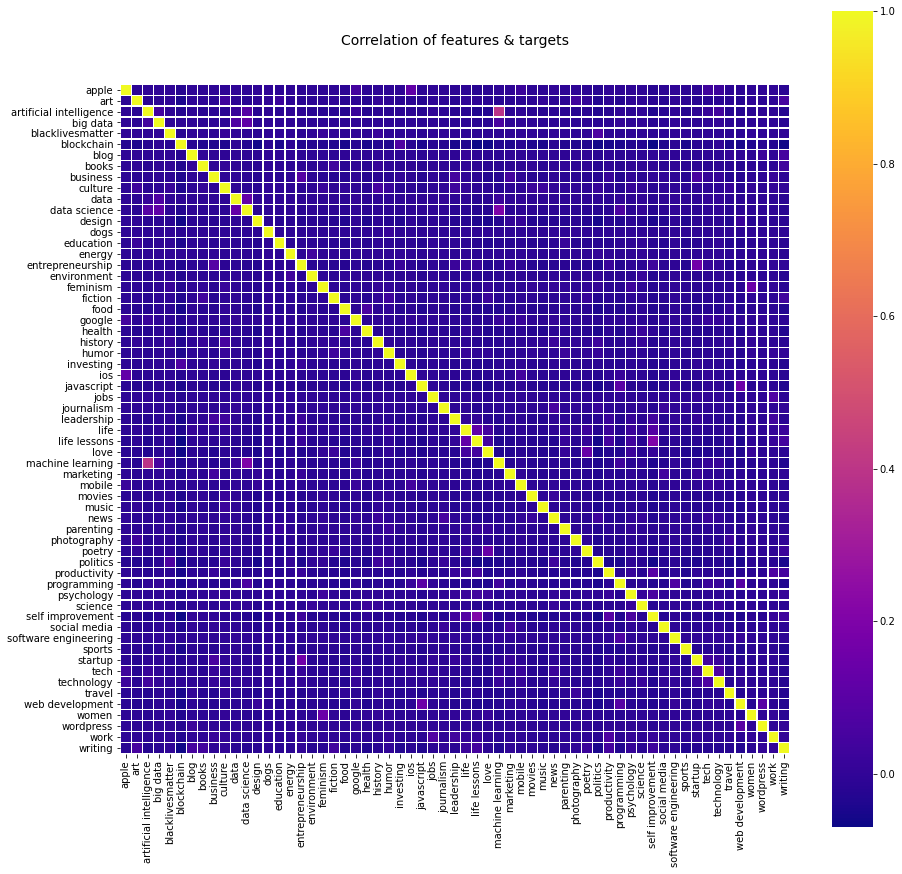

In [0]:
colormap = plt.cm.plasma
plt.figure(figsize=(15,15))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(train.iloc[:,2:-2].corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=False);

In [0]:
train.to_csv(r'/content/drive/My Drive/Colab Notebooks/Msc project/train.csv')
test.to_csv(r'/content/drive/My Drive/Colab Notebooks/Msc project/test.csv')